In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
import zipfile
import os

archive = next(iter(uploaded))

with zipfile.ZipFile(archive, 'r') as zip_ref:
    zip_ref.extractall("data")

In [ ]:
import pandas as pd

os.listdir("data")

df = pd.read_csv("data/diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Proje için en ideal veri setinin diabetes_binary_health_indicators_BRFSS2015.csv olduğuna karar verdik bu yüzden bununla devam ediyoruz.

In [ ]:
# Veri setinin yapısı
df.info()

# Temel istatistikler
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


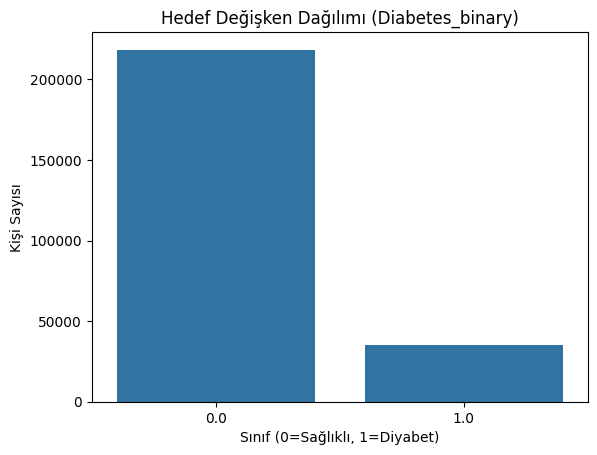

In [ ]:
#Hedef değişken dağılımı (Sınıf Dengesi)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diabetes_binary', data=df)
plt.title("Hedef Değişken Dağılımı (Diabetes_binary)")
plt.xlabel("Sınıf (0=Sağlıklı, 1=Diyabet)")
plt.ylabel("Kişi Sayısı")
plt.show()

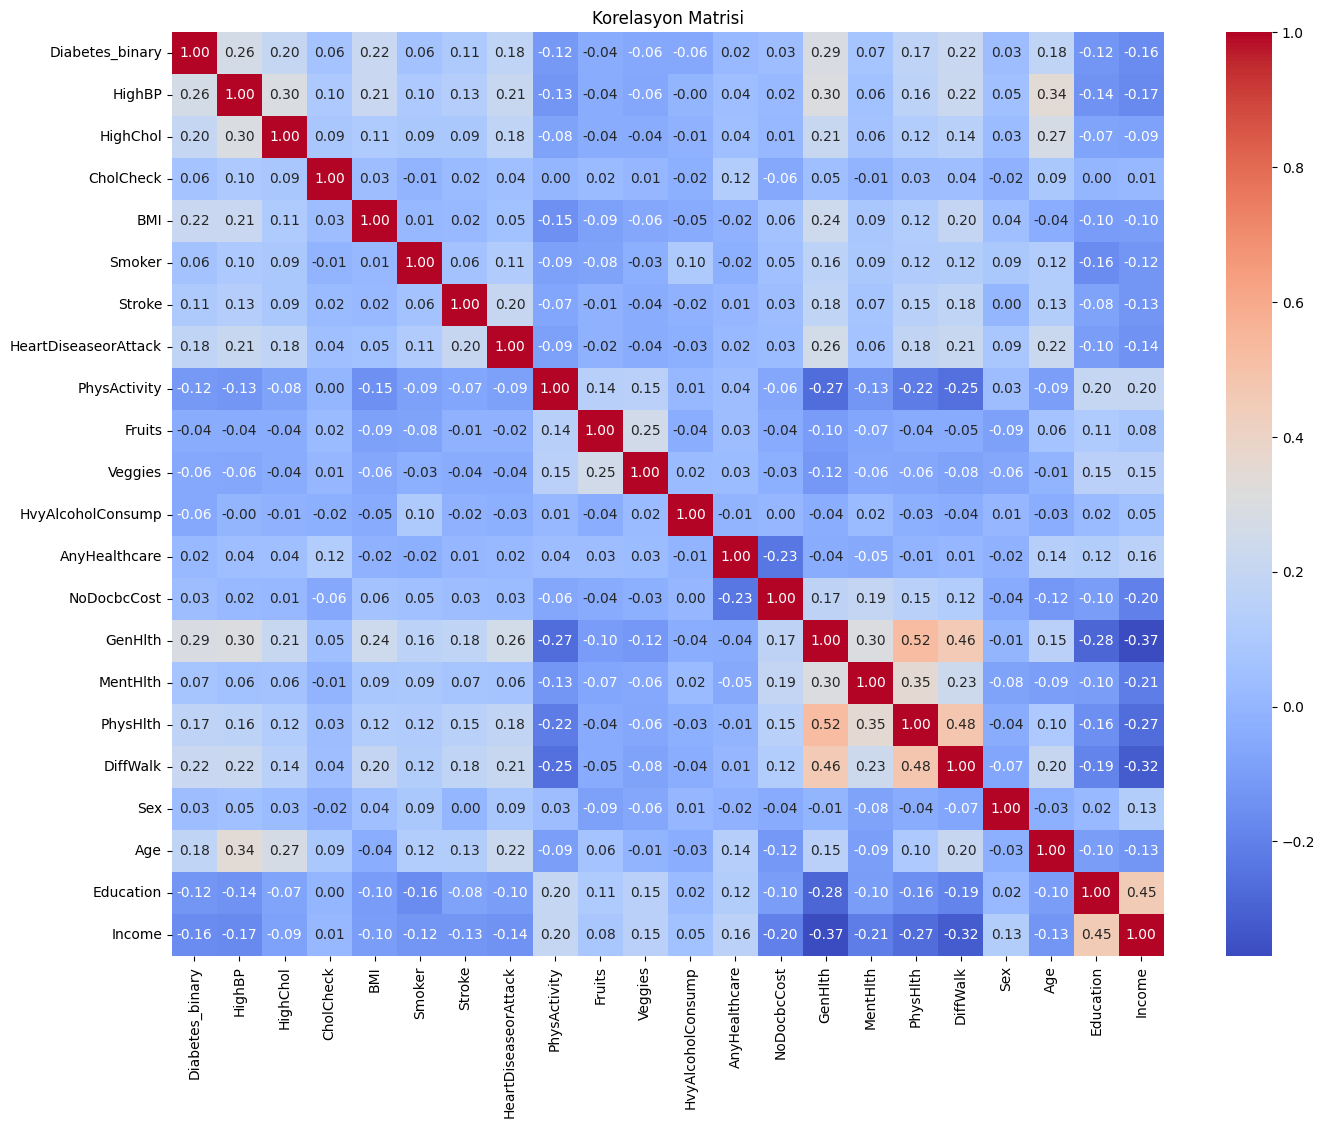

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Korelasyon matrisi
plt.figure(figsize=(16, 12))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

Korelasyon matrisi sayesinde birbiriyle yüksek ilişkili nitelikleri görebiliyoruz. Fiziksel sağlıkla genel sağlık arasında (GenHlth - PhysHlth) çok ciddi bir ilişki var örneğin. Birbirlerini destekliyorlar. Bunun dışında dağılım grafiğinden diyabeti olmayanların oranının çok daha fazla olduğunu gözlemliyoruz.

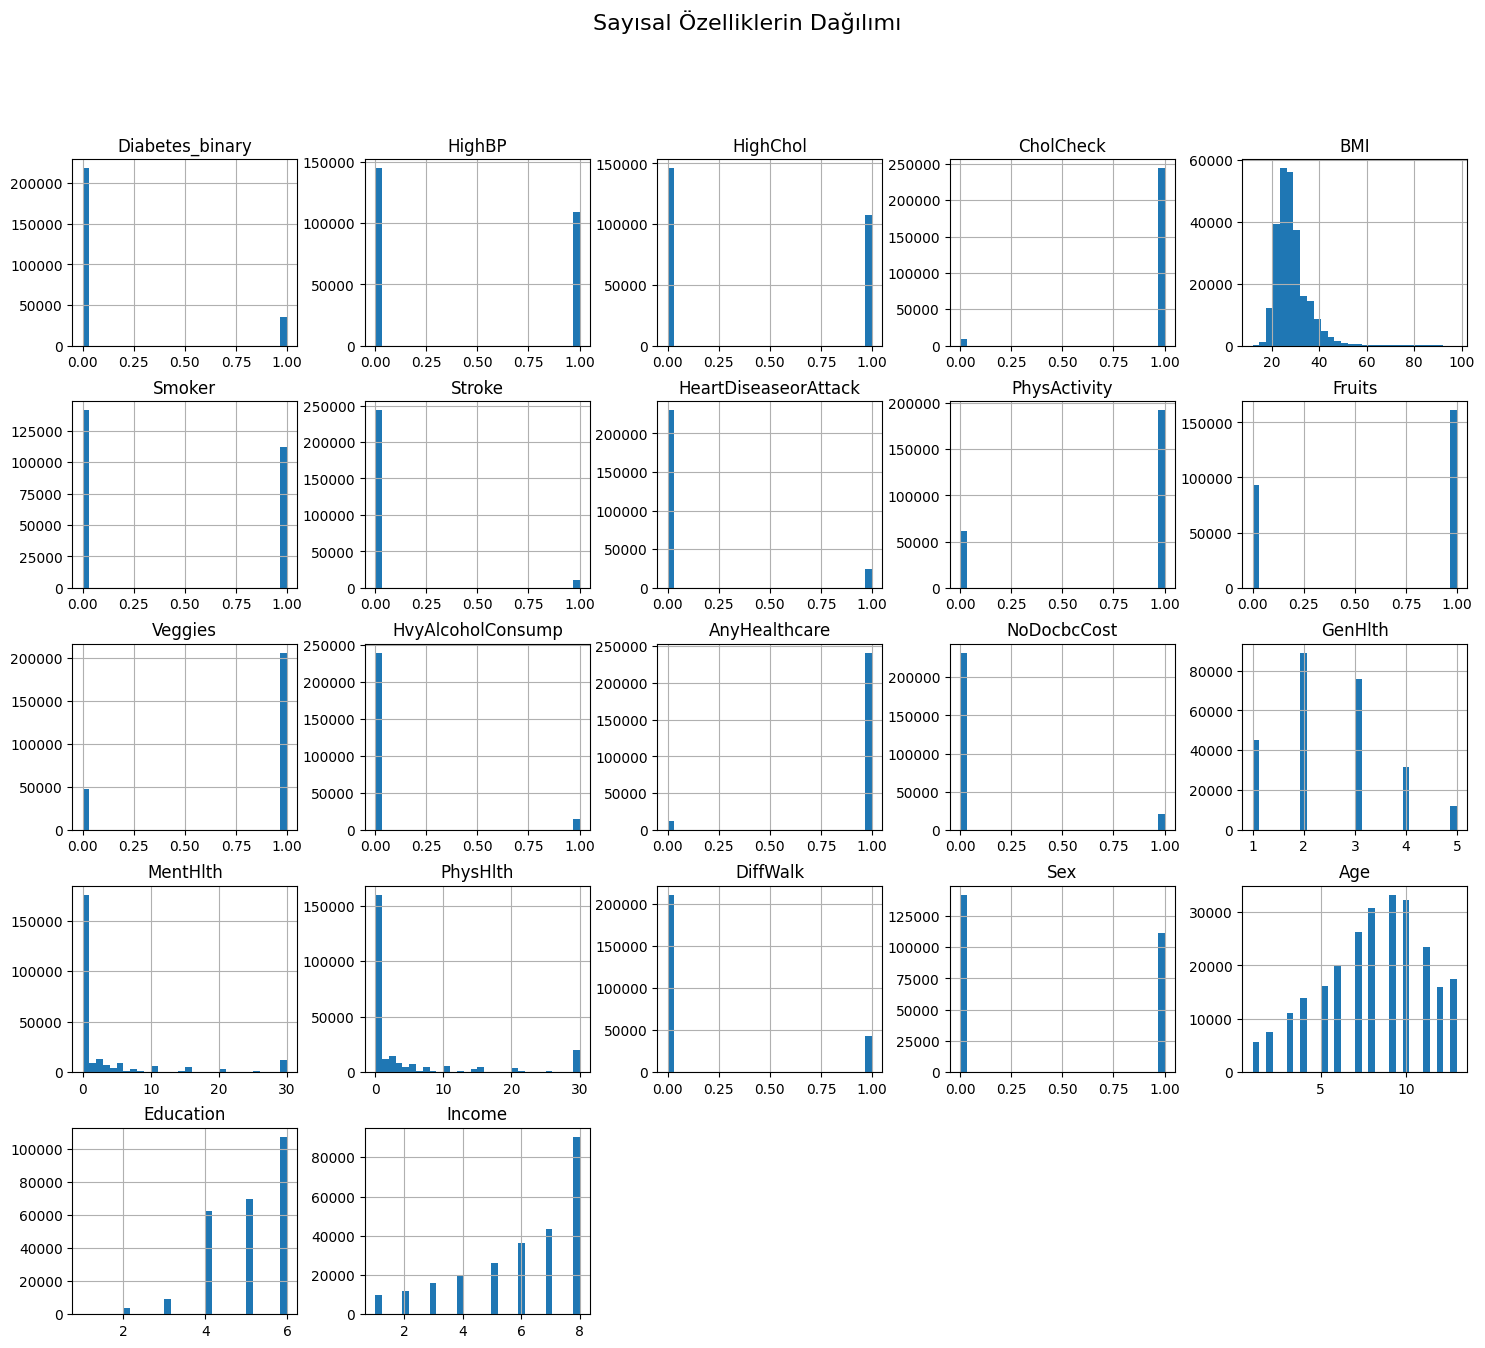

In [ ]:
df[numeric_cols].hist(figsize=(18, 15), bins=30)
plt.suptitle("Sayısal Özelliklerin Dağılımı", fontsize=16)
plt.show()

In [ ]:
import numpy as np

# Korelasyon matrisi
corr_matrix = df.corr().abs()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 0.85 üzeri korelasyonlara sahip sütunları bul
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]

print("Aşırı ilişkili olduğu için çıkarılabilecek öznitelikler:")
print(to_drop)

Aşırı ilişkili olduğu için çıkarılabilecek öznitelikler:
[]


Bu kodun bize boş liste döndürmesinden çıkardığımız sonuç: Veri setinde aşırı yüksek (0.85+) korelasyonlu öznitelikler yok. Özellikler arasında multicollinearity riski düşük ve bu yüzden hiçbir özniteliği çıkarmadan devam edeceğiz

In [ ]:
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

In [71]:
# Aykırı değerleri filtreleme (sağlık açısından makul aralıklar)
df_clean = df[
    (df['BMI'].between(12, 60)) &
    (df['GenHlth'].between(1, 5)) &
    (df['PhysHlth'].between(0, 30)) &
    (df['MentHlth'].between(0, 30))
].drop_duplicates()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228669 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       228669 non-null  float64
 1   HighBP                228669 non-null  float64
 2   HighChol              228669 non-null  float64
 3   CholCheck             228669 non-null  float64
 4   BMI                   228669 non-null  float64
 5   Smoker                228669 non-null  float64
 6   Stroke                228669 non-null  float64
 7   HeartDiseaseorAttack  228669 non-null  float64
 8   PhysActivity          228669 non-null  float64
 9   Fruits                228669 non-null  float64
 10  Veggies               228669 non-null  float64
 11  HvyAlcoholConsump     228669 non-null  float64
 12  AnyHealthcare         228669 non-null  float64
 13  NoDocbcCost           228669 non-null  float64
 14  GenHlth               228669 non-null  float64
 15  MentH